<img src="images/ProjectPythia_Logo_Final-01-Blue.svg" width=250 alt="Project Pythia Logo"></img>

# MetPy Skew-T Cookbook

---

## Overview
This Project Pythia Cookbook will cover creating Skew-T plots with MetPy. <br>

In this Cookbook, you will learn:
1. The foundations of creating a basic Skew-T with MetPy.
1. Adding advanced features to a Skew-T such as Convective Available Potential Energy (CAPE) and Convective Inhibition (CIN) shading, Lifted condensation Level marker (LCL) and parcel profile.
1. Creating a Hodograph with multiple layout options.
1. Accessing remote Upper Air data with Siphon from University of Wyoming and Iowa State University.
1. Using MetPy to calculate several Skew-T parameters.

## Prerequisites

| Concepts | Importance | Notes |
| --- | --- | --- |
| [Intermediate NumPy](https://foundations.projectpythia.org/core/numpy/intermediate-numpy.html)| Necessary | |
| [Matplotlib Basis](https://foundations.projectpythia.org/core/matplotlib/matplotlib-basics.html) | Necessary |

- **Time to learn**: 30 minutes


---

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.plots import add_metpy_logo, SkewT
from metpy.units import units

# Simple Sounding with MetPy Test Data

Use MetPy to make a simple Skew-T plot. This will serve as a base for all Skew-T plots throughout this cookbook. <br>

## Obtain Data and Format

Upper air data can be obtained using the siphon package, but for this example we will use some of MetPy's sample data.
`as_file_obj=False), skiprows=5, usecols=[0, 1, 2, 3, 6, 7], names=col_names)` is necessary due to the formatting of the MetPy sample data. This formatting is not needed when using upper air data obtained via Siphon. Obtaining data with Siphon will be covered in a later notebook. 

In [2]:
col_names = ['pressure', 'height', 'temperature', 'dewpoint', 'direction', 'speed']

sounding_data= pd.read_fwf(get_test_data('jan20_sounding.txt', as_file_obj=False),
                 skiprows=5, usecols=[0, 1, 2, 3, 6, 7], names=col_names)

# Drop any rows with all not a number (NaN) values for temperature, dewpoint, and winds
sounding_data = sounding_data.dropna(subset=('temperature', 'dewpoint', 'direction', 'speed'
                       ), how='all').reset_index(drop=True)

sounding_data.head()

,pressure,height,temperature,dewpoint,direction,speed
0,978.0,345,7.8,0.8,325,14
1,971.0,404,7.2,0.2,327,17
2,946.7,610,5.2,-1.8,335,26
3,944.0,634,5.0,-2.0,336,27
4,925.0,798,3.4,-2.6,340,32


## Assign Units

One of MetPy's powerful features is its unit syntax. MetPy typically requires units to be attached to arrays before being passed to MetPy functions. The MetPy documentation has a full tutorial section on [working with units](https://unidata.github.io/MetPy/latest/tutorials/unit_tutorial.html). <br>

In order to plot our sounding data, we will need to pass units to the individual variables in our dataset.

In [3]:
pres = sounding_data['pressure'].values * units.hPa
temp = sounding_data['temperature'].values * units.degC
dewpoint = sounding_data['dewpoint'].values * units.degC
wind_speed = sounding_data['speed'].values * units.knots
wind_dir = sounding_data['direction'].values * units.degrees
u, v = mpcalc.wind_components(wind_speed, wind_dir)

In [4]:
pres

Magnitude,[978.0 971.0 946.7 944.0 925.0 911.8 906.0 877.9 850.0 841.0 823.0 813.6 809.0 798.0 791.0 783.9 755.1 727.3 700.5 700.0 698.0 687.0 648.9 631.0 600.7 592.0 577.6 555.3 536.0 533.8 500.0 472.3 453.0 400.0 399.7 387.0 382.7 342.0 320.4 318.0 310.0 306.1 305.0 300.0 292.0 276.0 264.0 251.0 250.0 247.0 244.0 243.3 220.0 212.0 210.0 200.0 194.0 183.0 164.0 152.0 150.0 136.0 132.0 131.4 128.0 125.0 119.0 112.0 108.0 107.8 105.0 103.0 100.0]
Units,hectopascal


## Create Sounding Plot

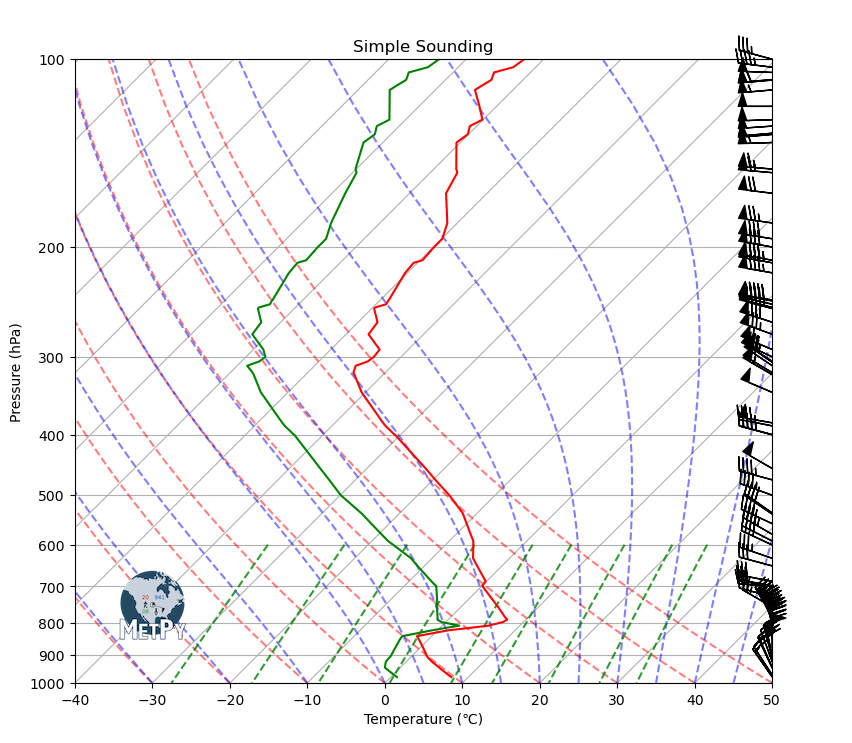

In [5]:
# Create figure and set size
fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig, rotation=45)

# Plot temperature and dewpoint lines
skew.plot(pres, temp, 'red')
skew.plot(pres, dewpoint, 'green')

# Plot wind barbs
skew.plot_barbs(pres, u, v)

# Improve labels and set axis limits
skew.ax.set_xlabel('Temperature (\N{DEGREE CELSIUS})')
skew.ax.set_ylabel('Pressure (hPa)')
skew.ax.set_ylim(1000, 100)

# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

# Add the MetPy logo!
fig = plt.gcf()
add_metpy_logo(fig, 115, 100, size='small');

# Add a title
plt.title('Simple Sounding');

### Let's Unpack the the Previous Code Cell

>`fig = plt.figure(figsize=(6, 6))` <br>
> - This line creates the figure and sets the size. Equal proportions are typically recommended for a Skew-T. <br>

 

>`skew = SkewT(fig, rotation=45)` <br>
> - Calls the MetPy [Skew-T](https://unidata.github.io/MetPy/latest/api/generated/metpy.plots.SkewT.html) function to create a figure that we can easily plot upper air data on. Rotation is set at 45 to create the characteristic skewed appearence of a Skew-T.

>`skew.plot(pres, temp, 'red')` <br>
>`skew.plot(pres, dewpoint, 'green')` <br>
>- These two lines plot the [temperature and dewpoint lines](https://unidata.github.io/MetPy/latest/api/generated/metpy.plots.SkewT.html#metpy.plots.SkewT.plot). The lines are set to the standard colors, but can be adjusted for colorblind accessibility. Matplotlib has extensive [documentation](https://matplotlib.org/stable/tutorials/colors/colormaps.html) on choosing colormaps and color vision deficiencies resources.

> `skew.plot_barbs(pres, u, v)`<br>
> - This line plots the wind barbs. Customization options can be found [here](https://unidata.github.io/MetPy/latest/api/generated/metpy.plots.SkewT.html#metpy.plots.SkewT.plot_barbs).

>`skew.ax.set_xlabel('Temperature (\N{DEGREE CELSIUS})')` <br>
>`skew.ax.set_ylabel('Pressure (hPa)')` <br>
>`skew.ax.set_ylim(1000, 100)` <br>
> - These lines improve the axes labels and set the y-axis limit to the standard values typically used in a Skew-T diagram. 
<br>

>`skew.plot_dry_adiabats()`<br>
>`skew.plot_moist_adiabats()`<br>
>`skew.plot_mixing_lines()`<br>
> - These add each relevant special line if desired. The argument `colors='preferred color here'` can be passed if you would like to change the colors from the default. Further customization options can be found in the MetPy [documentation](https://unidata.github.io/MetPy/latest/api/generated/metpy.plots.SkewT.html#metpy.plots.SkewT.plot_dry_adiabats) for each line.

>`fig = plt.gcf()`<br>
> - Gcf stands for get current figure. This retrieves the current figure and allows us to modify it with the following line. <br>

>`add_metpy_logo(fig, 115, 100)`<br>
>- When `add_metpy_logo` is included in the imports cell, it allows use of the `add_metpy_logo()` function. This is greatly appreciated when utilizing MetPy for your plots. The [position and size](https://unidata.github.io/MetPy/latest/api/generated/metpy.plots.add_metpy_logo.html#metpy.plots.add_metpy_logo) of the logo can be adjusted. 
<br>

>`plt.title('Simple Sounding');`<br>
>- This adds the title to the figure. The ; removes text that populates above the figure. 
<br>

## Now, Let's Improve the Wind Barbs
We will use the same code as above, but will add three additional lines of code. 

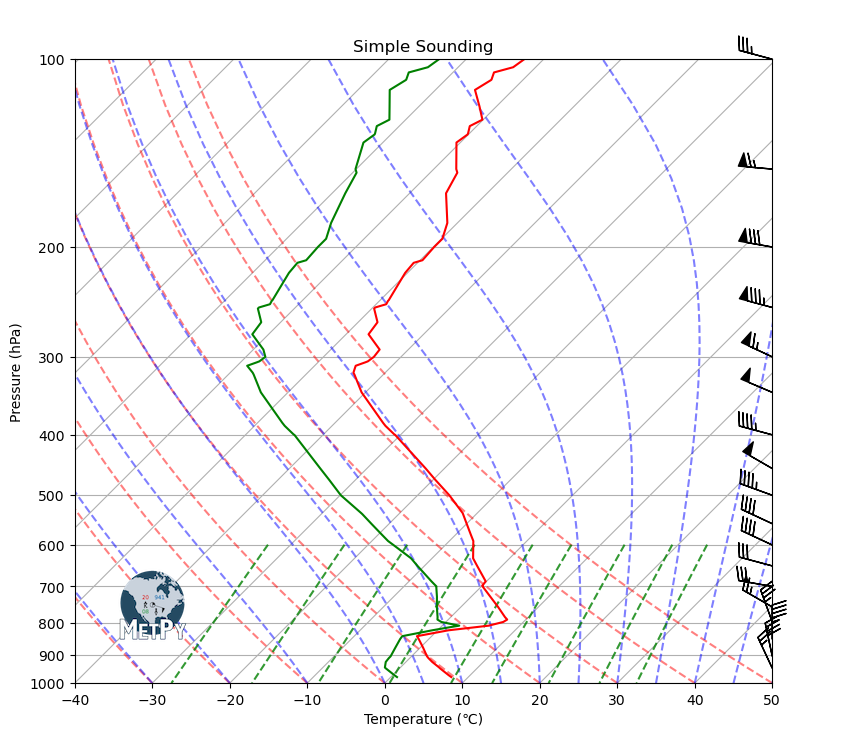

In [6]:
# Create figure and set size
fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig, rotation=45)

# Plot temperature and dewpoint lines
skew.plot(pres, temp, 'red')
skew.plot(pres, dewpoint, 'green')

# Set spacing interval--Every 50 hPa from 1000 to 100 hPa
my_interval = np.arange(100, 1000, 50) * units('hPa')

# Get indexes of values closest to chosen interval
ix = mpcalc.resample_nn_1d(pres, my_interval)

# Plot wind barbs with values nearest to chosen interval values
skew.plot_barbs(pres[ix], u[ix], v[ix])

# Improve labels and set axis limits
skew.ax.set_xlabel('Temperature (\N{DEGREE CELSIUS})')
skew.ax.set_ylabel('Pressure (hPa)')
skew.ax.set_ylim(1000, 100)

# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

# Add the MetPy logo!
fig = plt.gcf()
add_metpy_logo(fig, 115, 100, size='small');

# Add a title
plt.title('Simple Sounding');

The wind barbs on this plot are much more readable. Let's review the added code to understand why.

> `my_interval = np.arange(100, 1000, 50) * units('hPa')`
> - This creates a custom spacing interval from the pressure levels the wind barbs are plotted on.

> `ix = mpcalc.resample_nn_1d(pres, my_interval)`
> - We defined where we want the wind barbs with `my_interval`. Since mb is not an index in our dataset, we have to use the function `mpcalc.resample_nn_1d()` to determine what index value each interval closest matches up with. Further information can be found in the MetPy [documentation](https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.resample_nn_1d.html#metpy.calc.resample_nn_1dhttps://unidata.github.io/MetPy/latest/api/generated/metpy.calc.resample_nn_1d.html#metpy.calc.resample_nn_1d).

>`skew.plot_barbs(pres[ix], u[ix], v[ix])`
> - Now we just add the `ix` variable to each parameter in `.plot_barbs()` to produce the wind barbs at the interval we set.

## Optional Step
We can extend the moist adiabat, dry adiabat, and mixing ratio lines throughout the figure by adding including optional parameters. See the [documentation](https://unidata.github.io/MetPy/latest/api/generated/metpy.plots.SkewT.html#metpy.plots.SkewT.plot_dry_adiabats) for details on how to further adjust these for readability preferences. 

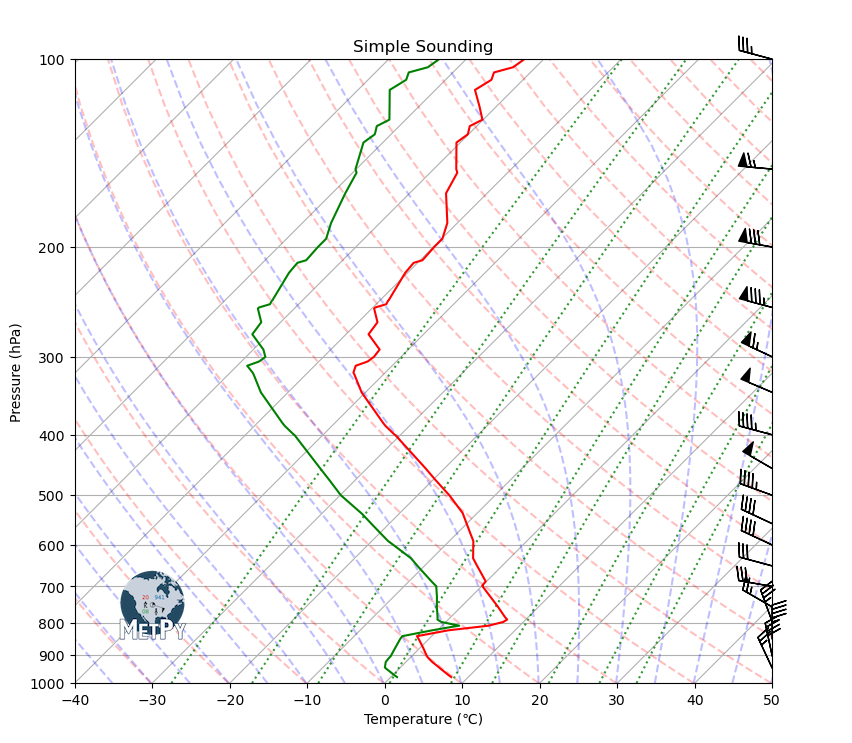

In [7]:
# Create figure and set size
fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig, rotation=45)

# Plot temperature and dewpoint lines
skew.plot(pres, temp, 'red')
skew.plot(pres, dewpoint, 'green')

# Set spacing interval--Every 50 hPa from 1000 to 100 hPa
my_interval = np.arange(100, 1000, 50) * units('hPa')

# Get indexes of values closest to chosen interval
ix = mpcalc.resample_nn_1d(pres, my_interval)

# Plot wind barbs with values nearest to chosen interval values
skew.plot_barbs(pres[ix], u[ix], v[ix])

# Improve labels and set axis limits
skew.ax.set_xlabel('Temperature (\N{DEGREE CELSIUS})')
skew.ax.set_ylabel('Pressure (hPa)')
skew.ax.set_ylim(1000, 100)

# Add the relevant special lines
skew.plot_dry_adiabats(t0=np.arange(233, 533, 10) * units.K, alpha=0.25, color='orangered')
skew.plot_moist_adiabats(t0=np.arange(233, 400, 5) * units.K, alpha=0.25, color='tab:green')
skew.plot_mixing_lines(pressure=np.arange(1000, 99, -25) * units.hPa, linestyle='dotted', color='tab:blue')

# Add the MetPy logo!
fig = plt.gcf()
add_metpy_logo(fig, 115, 100, size='small');

# Add a title
plt.title('Simple Sounding');

## Resources and references
> [MetPy Documentation](https://unidata.github.io/MetPy/latest/index.html) <br>
> [Unidata Main Website](https://www.unidata.ucar.edu) <br>
> [Unidata GitHub](https://github.com/Unidata) <br>
> [Unidata YouTube Channel](https://www.youtube.com/user/unidatanews) <br>
> [Matplotlib Documentation](https://matplotlib.org) <br>
> [Unidata Python Training](https://unidata.github.io/python-training/) <br>
